## Sea Water Potential Temperature (First Observation of final proj)

In [1]:
from cartopy import crs as ccrs, feature as cfeature        
import cmocean                   
import matplotlib.path as mpath   
import momlevel as ml             
import matplotlib.pyplot as plt
import zarr
import xarray as xr
import numpy as np
import cftime
import gcsfs 
import pandas as pd

In [2]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
gcs = gcsfs.GCSFileSystem(token='anon')

In [3]:
esm4_basins = xr.open_dataset('/home/ees_student/Taboada_Final_G2/EES3506_5506_Fall2023_Final_Project_G4/data/basins/esm4_basins_gr.nc').basins

In [4]:
thetao126 = google_cloud_cmip6.query("activity_id == 'ScenarioMIP' & source_id == 'GFDL-ESM4' & institution_id == 'NOAA-GFDL' & experiment_id == 'ssp126' & table_id == 'Omon' & member_id =='r1i1p1f1' & grid_label == 'gr' & variable_id == 'thetao'")

In [5]:
thetao245 = google_cloud_cmip6.query("activity_id == 'ScenarioMIP' & source_id == 'GFDL-ESM4' & institution_id == 'NOAA-GFDL' & experiment_id == 'ssp245' & table_id == 'Omon' & member_id =='r1i1p1f1' & grid_label == 'gr' & variable_id == 'thetao'")

In [6]:
thetao585 = google_cloud_cmip6.query("activity_id == 'ScenarioMIP' & source_id == 'GFDL-ESM4' & institution_id == 'NOAA-GFDL' & experiment_id == 'ssp585' & table_id == 'Omon' & member_id =='r1i1p1f1' & grid_label == 'gr' & variable_id == 'thetao'")

In [7]:
esm4_thetao126 = thetao126.zstore.values[-1]
esm4_thetao245 = thetao245.zstore.values[-1]
esm4_thetao585 = thetao585.zstore.values[-1]

In [8]:
mapper_esm4_thetao126 = gcs.get_mapper(esm4_thetao126)
gfdl_esm4_thetao126 = xr.open_zarr(mapper_esm4_thetao126,
                                consolidated=True,use_cftime=True).thetao.rename({'lat':'latitude',
                                                             'lon':'longitude'})
#gfdl_esm4_thetao126 

In [9]:
mapper_esm4_thetao245 = gcs.get_mapper(esm4_thetao245)
gfdl_esm4_thetao245 = xr.open_zarr(mapper_esm4_thetao245,
                                consolidated=True,use_cftime=True).thetao.rename({'lat':'latitude',
                                                             'lon':'longitude'})
#gfdl_esm4_thetao245 

In [10]:
mapper_esm4_thetao585 = gcs.get_mapper(esm4_thetao585)
gfdl_esm4_thetao585 = xr.open_zarr(mapper_esm4_thetao585,
                                consolidated=True,use_cftime=True).thetao.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_thetao585 

<xarray.DataArray 'thetao' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-thetao, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Sea Water Potential Temperature
    original_name:  thetao
    standard_name:  sea_water_potential_temperature
    units:          degC

In [11]:
thetao585_K = gfdl_esm4_thetao585+273.15
thetao245_K = gfdl_esm4_thetao245+273.15
thetao126_K = gfdl_esm4_thetao126+273.15

In [12]:
first20_585 = thetao585_K.sel(
    time = slice('2015-01-16', '2035-12-16')).mean('time')

last20_585 = thetao585_K.sel(
    time = slice('2080-01-16', '2100-12-16')).mean('time')

diff_585 = last20_585-first20_585

In [13]:
first20_245 = thetao245_K.sel(
    time = slice('2015-01-16', '2035-12-16')).mean('time')

last20_245 = thetao245_K.sel(
    time = slice('2080-01-16', '2100-12-16')).mean('time')

diff_245 = last20_245-first20_245

In [14]:
first20_126 = thetao126_K.sel(
    time = slice('2015-01-16', '2035-12-16')).mean('time')

last20_126 = thetao126_K.sel(
    time = slice('2080-01-16', '2100-12-16')).mean('time')

diff_126 = last20_126-first20_126

Text(0.5, 0.98, 'Ocean Temperature Projections')

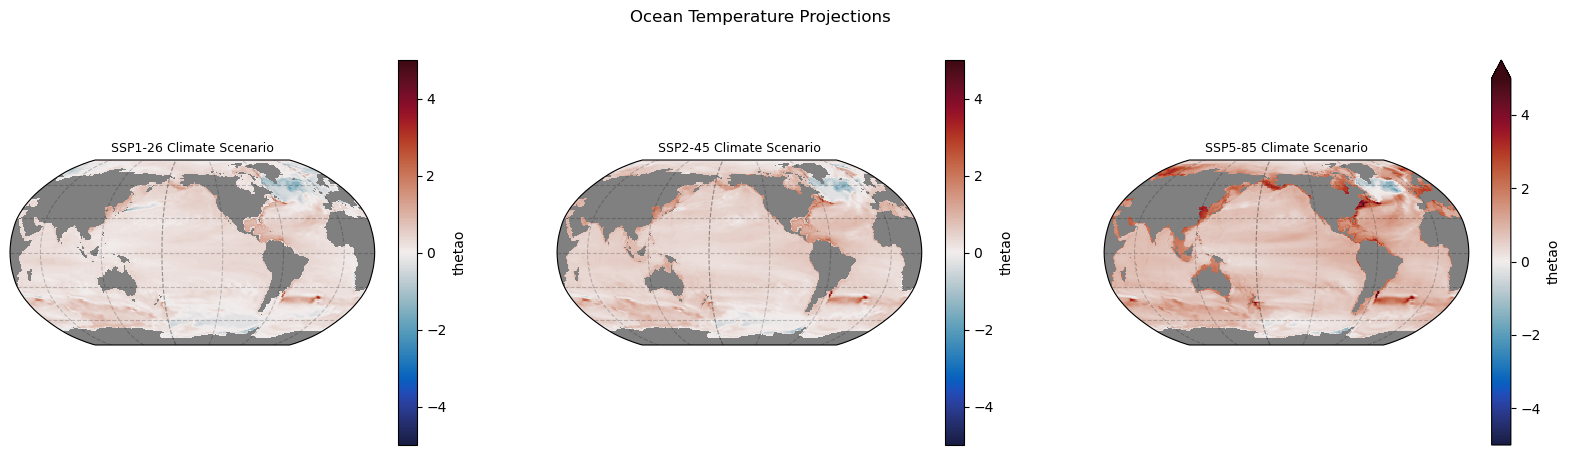

In [15]:
subplot_kws=dict(projection=ccrs.Robinson(central_longitude=-150), 
         facecolor='grey') ## Make a dictionary to define the projection and face color

fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), subplot_kw = subplot_kws)
##setting up subplot parameters

p1 = diff_126.mean(dim='lev').plot(ax = ax1, x='longitude', y='latitude', ##first plot of SSP1-26 scenario
            vmin=-5,vmax=5,
           cmap=cmocean.cm.balance,
           transform=ccrs.PlateCarree())

p2 = diff_245.mean(dim='lev').plot(ax = ax2, x='longitude', y='latitude', ##second plot of SSP2-45 scenario
               vmin=-5,vmax=5,
           cmap=cmocean.cm.balance,
           transform=ccrs.PlateCarree())

p3 = diff_585.mean(dim='lev').plot(ax = ax3, x='longitude', y='latitude', ##third plot of SSP5-85 scenario
               vmin=-5,vmax=5,
           cmap=cmocean.cm.balance,
           transform=ccrs.PlateCarree())

p1.axes.gridlines(color='black', alpha=0.2, linestyle='--') ##adding gridlines to each subplot
p2.axes.gridlines(color='black', alpha=0.2, linestyle='--')
p3.axes.gridlines(color='black', alpha=0.2, linestyle='--')

ax1.set_title('SSP1-26 Climate Scenario', fontsize = 9) ##adding titles to each subplot
ax2.set_title('SSP2-45 Climate Scenario', fontsize = 9)
ax3.set_title('SSP5-85 Climate Scenario', fontsize = 9)

fig.suptitle("Ocean Temperature Projections")


##MEAN THE LEVELS

**Figure 1.** Increases in ocean temperature in three different GFDL-ESM4 climate scenarios: SSP5-85, SSP2-45, and SSP1-26. Temperature was originally measured in degrees Celsius and converted to Kelvin, and temperature values were averaged across ocean depth. 

Text(0.5, 1.0, 'Ocean Basin Mask')

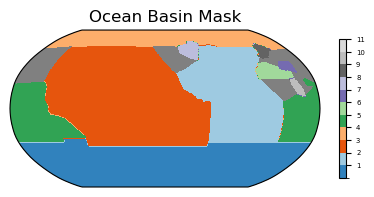

In [16]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[5,3])

p = esm4_basins.plot.contourf(x='longitude',y='latitude',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=5)
plt.title('Ocean Basin Mask',fontsize=12)

In [17]:
southernocean = (esm4_basins.where(esm4_basins==1) / esm4_basins.where(esm4_basins==1))
atlanticocean = (esm4_basins.where(esm4_basins==2) / esm4_basins.where(esm4_basins==2))
pacificocean = (esm4_basins.where(esm4_basins==3) / esm4_basins.where(esm4_basins==3))
arcticocean = (esm4_basins.where(esm4_basins==4) / esm4_basins.where(esm4_basins==4))
indianocean = (esm4_basins.where(esm4_basins==5) / esm4_basins.where(esm4_basins==5))

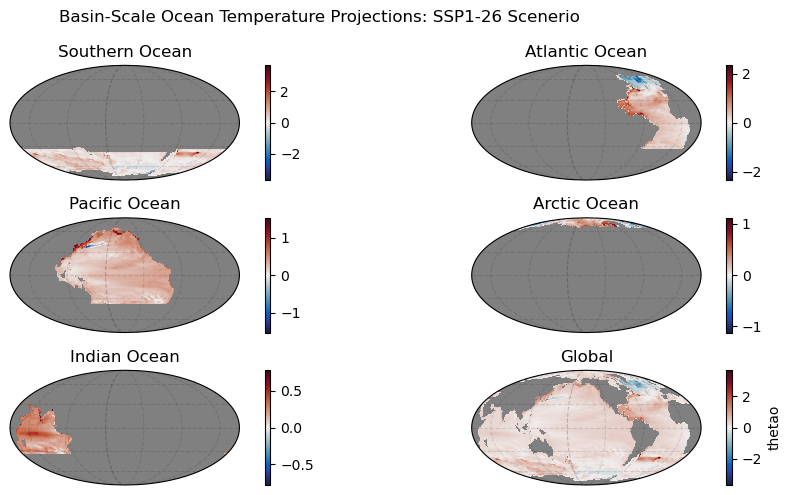

In [21]:
subplot_kws=dict(projection=ccrs.Mollweide(central_longitude=-150),
                 facecolor='grey')

fig, (ax)=plt.subplots(ncols=2,nrows=3, figsize=(10,5),subplot_kw=subplot_kws)

(diff_126*southernocean).mean(dim='lev').plot( cmap=cmocean.cm.balance, ax=ax[0,0],
                              transform=ccrs.PlateCarree())
(diff_126*atlanticocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, ax=ax[0,1],
                                transform=ccrs.PlateCarree())
(diff_126*pacificocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, ax=ax[1,0],
                              transform=ccrs.PlateCarree())
(diff_126*arcticocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, ax=ax[1,1],
                              transform=ccrs.PlateCarree())
(diff_126*indianocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, ax=ax[2,0],
                              transform=ccrs.PlateCarree())
diff_126.mean(dim='lev').plot(cmap=cmocean.cm.balance, ax=ax[2,1],
                              transform=ccrs.PlateCarree())

ax[0,0].set_title('Southern Ocean')
ax[0,1].set_title('Atlantic Ocean')
ax[1,0].set_title('Pacific Ocean')
ax[1,1].set_title('Arctic Ocean')
ax[2,0].set_title('Indian Ocean')
ax[2,1].set_title('Global')

ax[0,0].axes.gridlines(color='black', alpha=0.1, linestyle='--') ##adding gridlines to each subplot
ax[0,1].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[1,0].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[1,1].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[2,0].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[2,1].axes.gridlines(color='black', alpha=0.1, linestyle='--')

fig.suptitle('Basin-Scale Ocean Temperature Projections: SSP1-26 Scenerio')
plt.tight_layout()

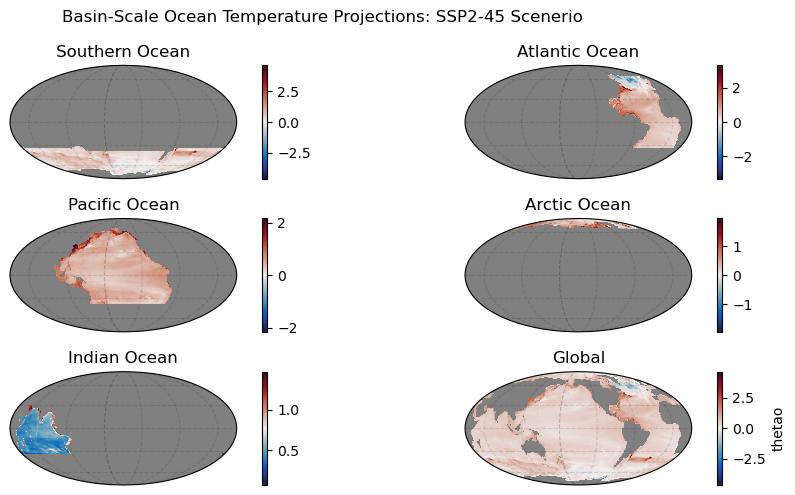

In [22]:
subplot_kws=dict(projection=ccrs.Mollweide(central_longitude=-150),
                 facecolor='grey')

fig, (ax)=plt.subplots(ncols=2,nrows=3, figsize=(10,5),subplot_kw=subplot_kws)

(diff_245*southernocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, ax=ax[0,0],
                              transform=ccrs.PlateCarree())
(diff_245*atlanticocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, ax=ax[0,1],
                                transform=ccrs.PlateCarree())
(diff_245*pacificocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, ax=ax[1,0],
                              transform=ccrs.PlateCarree())
(diff_245*arcticocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, ax=ax[1,1],
                              transform=ccrs.PlateCarree())
(diff_245*indianocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, ax=ax[2,0],
                              transform=ccrs.PlateCarree())
diff_245.mean(dim='lev').plot(cmap=cmocean.cm.balance, ax=ax[2,1],
                              transform=ccrs.PlateCarree())

ax[0,0].set_title('Southern Ocean')
ax[0,1].set_title('Atlantic Ocean')
ax[1,0].set_title('Pacific Ocean')
ax[1,1].set_title('Arctic Ocean')
ax[2,0].set_title('Indian Ocean')
ax[2,1].set_title('Global')

ax[0,0].axes.gridlines(color='black', alpha=0.1, linestyle='--') ##adding gridlines to each subplot
ax[0,1].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[1,0].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[1,1].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[2,0].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[2,1].axes.gridlines(color='black', alpha=0.1, linestyle='--')

fig.suptitle('Basin-Scale Ocean Temperature Projections: SSP2-45 Scenerio')
plt.tight_layout()

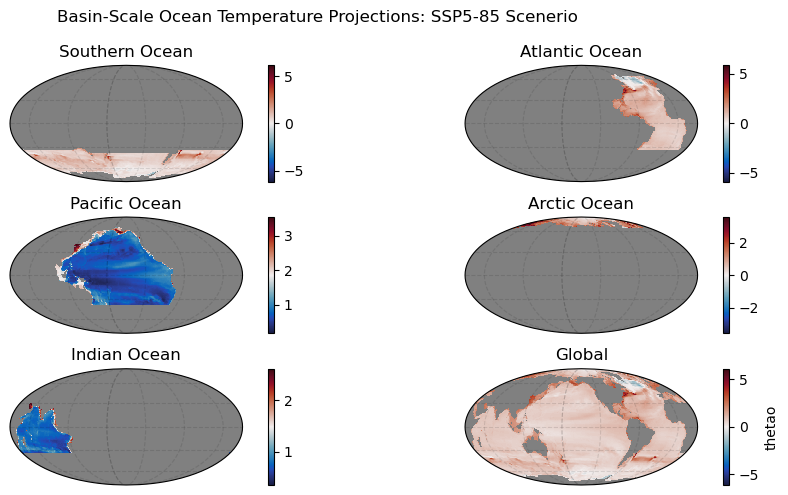

In [23]:
subplot_kws=dict(projection=ccrs.Mollweide(central_longitude=-150),
                 facecolor='grey')

fig, (ax)=plt.subplots(ncols=2,nrows=3, figsize=(10,5),subplot_kw=subplot_kws)

(diff_585*southernocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, ax=ax[0,0],
                              transform=ccrs.PlateCarree())
(diff_585*atlanticocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, ax=ax[0,1],
                                transform=ccrs.PlateCarree())
(diff_585*pacificocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, ax=ax[1,0],
                              transform=ccrs.PlateCarree())
(diff_585*arcticocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, ax=ax[1,1],
                              transform=ccrs.PlateCarree())
(diff_585*indianocean).mean(dim='lev').plot(cmap=cmocean.cm.balance, ax=ax[2,0],
                              transform=ccrs.PlateCarree())
diff_585.mean(dim='lev').plot(cmap=cmocean.cm.balance, ax=ax[2,1],
                              transform=ccrs.PlateCarree())

ax[0,0].set_title('Southern Ocean')
ax[0,1].set_title('Atlantic Ocean')
ax[1,0].set_title('Pacific Ocean')
ax[1,1].set_title('Arctic Ocean')
ax[2,0].set_title('Indian Ocean')
ax[2,1].set_title('Global')

ax[0,0].axes.gridlines(color='black', alpha=0.1, linestyle='--') ##adding gridlines to each subplot
ax[0,1].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[1,0].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[1,1].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[2,0].axes.gridlines(color='black', alpha=0.1, linestyle='--')
ax[2,1].axes.gridlines(color='black', alpha=0.1, linestyle='--')

fig.suptitle('Basin-Scale Ocean Temperature Projections: SSP5-85 Scenerio')
plt.tight_layout()

## Tasks left:
- ~~basin scale diff plots~~
- figure caps
- averages, std, sums and such
- markdown about heat content